In [1]:
import pandas as pd

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt


In [4]:
state_tracker = pd.read_csv('https://covidtracking.com/api/states.csv')

In [5]:
population = pd.read_csv('http://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-popchg2010_2019.csv?#')

In [6]:
states = pd.merge(state_tracker,population[['STATE','POPESTIMATE2019','NAME']],left_on='fips', right_on='STATE')

In [7]:
states.rename(columns={"POPESTIMATE2019":"population"}, inplace=True)

In [8]:
states['positive_per_100_tested'] = states['positive']/states['totalTestResults'] * 100

In [29]:
states['positive_per_100k_population'] = states['positive']/states['population'] * 100000

In [10]:
states['recovered_per_100_positive'] = states['recovered'] / states['positive'] * 100

### Top ten states with positive cases

In [11]:
top_states = states.sort_values(by='positive', ascending=False).head(20)

In [12]:
top_states.plot(kind='bar',x='state', y=['totalTestResults','positive'], color=['yellow','red'])

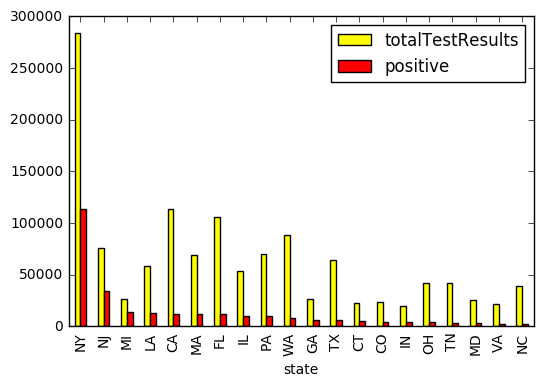

In [13]:
plt.show()

In [27]:
states.sort_values(by='recovered_per_100_positive', ascending=False).head(20).plot(kind='bar',x='state',y='recovered_per_100_positive')

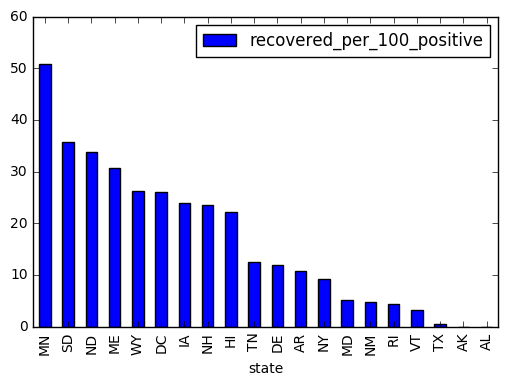

In [28]:
plt.show()

### Top 10 states with positive cases for every 100 tested

In [18]:
top_states_pos_perc = states.sort_values(by='positive_per_100_tested', ascending=False).head(10)

In [19]:
top_states_pos_perc.plot(kind='bar',y='positive_per_100_tested',x='state')

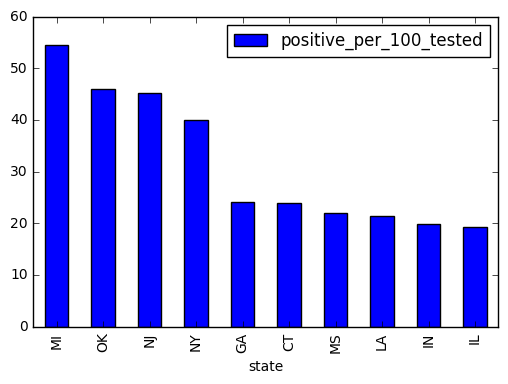

In [20]:
plt.show()

### Top 20 states with positive cases per every 100K of population

In [30]:
top_states_pos_per_100k = states.sort_values(by='positive_per_100k_population', ascending=False).head(20)

In [31]:
top_states_pos_per_100k.plot(kind='bar',x='state',y='positive_per_100k_population')

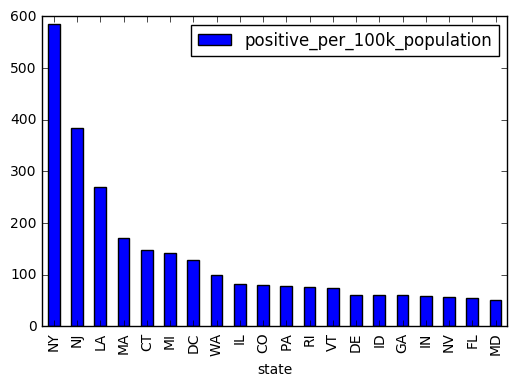

In [32]:
plt.show()

In [24]:
states.sort_values(by='recovered_per_100_positive', ascending=False).head(20).plot(kind='bar',x='state',y='recovered_per_100_positive')

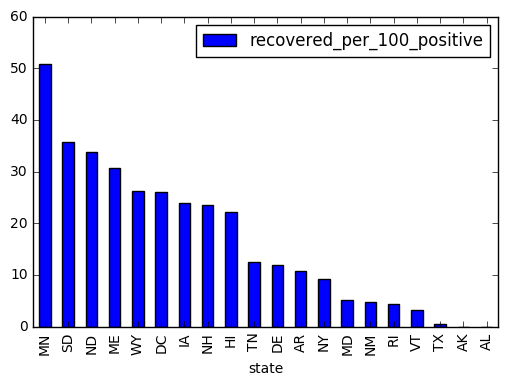

In [25]:
plt.show()